<a href="https://colab.research.google.com/github/riccardocappi/Machine_Learning_Course/blob/main/Delta_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Perceptron - Delta Rule###
**Riccardo Cappi, 2073768**

In [ ]:
import numpy as np
import math
from itertools import product
import matplotlib.pyplot as plt
from sklearn import datasets

###Perceptron Class###

In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

class Perceptron:
  def __init__(self,data,t,lr,steps):
    self.lr = lr
    self.data = data
    self.steps = steps
    self.S = list(zip(data,t))
    self.w = []

  def gradient_computation(self):
    self.w = np.random.uniform(low = -0.05, high = 0.05 , size=self.data.shape[1]+1)
    for _ in range(self.steps):
      delta_w = np.zeros(self.data.shape[1]+1)
      for x,t in self.S:
        # Add x0 = 1 for bias
        x = np.asarray([1] + list(x))
        o = self.predict(x[1:])
        # Update delta_w considering the sigmoid derivative
        delta_w = delta_w + self.lr * (t-o)*o*(1.0-o)*x
      self.w = self.w + delta_w
    return self.w[0], self.w[1:]

  def predict(self, x):
    y = np.dot(self.w[1:],x) + self.w[0]  # compute w ⋅ x + b
    return sigmoid(y)



###Test on linearly separable dataset###

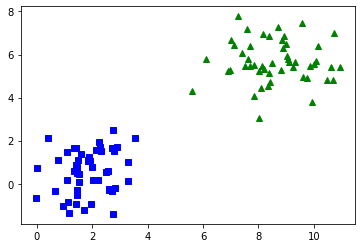

In [ ]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()


bias:  6.056905875769676
weights:  [-0.73470218 -0.8563561 ]


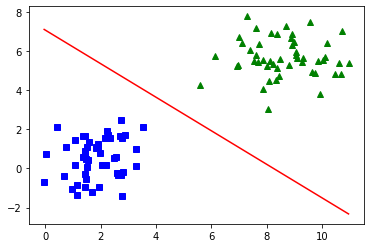

In [ ]:
model = Perceptron(X,y,0.01,3000)
bias,weights = model.gradient_computation()
print('\nbias: ',bias)
print('weights: ', weights)
slope = -weights[0] / weights[1]
intercept = -bias / weights[1]

x0 = np.min(X[:,0])
x1 = np.max(X[:,0])
hyperplane = np.array([x0,x1])*slope + intercept
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.plot([x0,x1],hyperplane,'r')
plt.show()
